In [3]:
import urllib
import os

[03/11/2021 02:23:50 PM] [INFO] [configs.py:74] [__init__()] Initialised Cord client with endpoint: https://api.cord.tech/public and project_id: 499f6b35-de54-4e23-82ac-19420fabd3c0
[03/11/2021 02:23:50 PM] [INFO] [querier.py:93] [execute()] Request: {"query_type": "project", "query_method": "GET", "values": {"uid": null, "payload": null}}


In [68]:
from encord.client import EncordClient
client = EncordClient.initialise(
  'ff31ec11-fd68-4db9-a8c2-a4e97cbb4b7e',  # Project ID
  'cR2DFqKUVsnZCzJ_xvG7ZkxniWv7MeINnAYI8dNMnHQ'  # API key
)
# Get and print project info (labels, datasets)
project = client.get_project()
print(project)

In [72]:
label_hash_list = []
for i in range(len(project['label_rows'])):
    if(project['label_rows'][i]['data_title'].startswith('video')):
        print(project['label_rows'][i]['data_title'])
        label_hash_list.append(project['label_rows'][i]['label_hash'])

video 90 - 3.mp4
video 70 - 2.mp4
video 64 - 1.mp4
video 82 - 5.mp4
video 74 - 2.mp4
video 78 - 5.mp4
video 83-4.mp4
video 76 - 4.mp4
video 77 - 3.mp4
video 85-0.mp4
video 68 - 1.mp4
video 84-3.mp4
video 86-5.mp4
video 92-4.mp4
video 94-8.mp4
video 91-4.mp4
video 93-4.mp4
video 62 - 5.mp4
video 67 - 5.mp4
video 79 - 4.mp4
video 71 -1.mp4
video 87 - 6.mp4
video 88 - 1.mp4
video 73 - 5.mp4
video 69 - 7.mp4
video 81 - 4.mp4
video 66 - 0.mp4
video 63 - 2.mp4
video 65 - 4.mp4
video 72-1.mp4
video 80 - 2.mp4
video 75 - 5.mp4


In [82]:
for i in range(len(label_hash_list)):
    label_blurb = client.get_label_row(label_hash_list[i])
    for key in label_blurb['data_units'].keys():
        if(key.find('answers')==-1):
#            try: 
            data_link = label_blurb['data_units'][key]['data_link']
            data_title = label_blurb['data_units'][key]['data_title']
            new_title = 'UC'+data_title.split(' ')[1]+'-'+ str(int(data_title.split('-')[1].split('.')[0]))+'.mp4'
            print(new_title)
            try:
                os.mkdir(new_title)
                os.mkdir(new_title+'/video/')
                urllib.request.urlretrieve(data_link,new_title+'/video/video.mp4')
            except:
                print(new_title)
#            except:
#             print('error '+data_title)

[03/14/2021 04:18:09 PM] [INFO] [querier.py:93] [execute()] Request: {"query_type": "labelrow", "query_method": "GET", "values": {"uid": "42c8384b-30ec-4c8e-aeb4-8513de6..
UC90-3.mp4
UC90-3.mp4
[03/14/2021 04:18:09 PM] [INFO] [querier.py:93] [execute()] Request: {"query_type": "labelrow", "query_method": "GET", "values": {"uid": "5e8cd614-2ef3-43bd-a287-6fcfe71..
UC70-2.mp4
[03/14/2021 04:18:11 PM] [INFO] [querier.py:93] [execute()] Request: {"query_type": "labelrow", "query_method": "GET", "values": {"uid": "f5d7304a-8fa2-4fbd-9216-b3d48dd..
UC64-1.mp4
UC64-1.mp4
[03/14/2021 04:18:11 PM] [INFO] [querier.py:93] [execute()] Request: {"query_type": "labelrow", "query_method": "GET", "values": {"uid": "099b28ab-37f9-4617-83fe-0b76201..
UC82-5.mp4
[03/14/2021 04:18:13 PM] [INFO] [querier.py:93] [execute()] Request: {"query_type": "labelrow", "query_method": "GET", "values": {"uid": "5b8d1ad5-4b12-49e2-80fd-6ab83e9..
UC74-2.mp4
UC74-2.mp4
[03/14/2021 04:18:13 PM] [INFO] [querier.py:93] [exe

In [93]:
true_video_scores = []
pred_video_scores = []
true_frame_scores = []
pred_frame_scores = []

In [94]:
for video_path in video_folder_paths:
    
    print("processing: "+video_path)
    true_video_score = int(video_path[-21])
    true_video_scores.append(true_video_score)
    
    video = cv2.VideoCapture(video_path)
    
    frame_count=0
    temp_frame_pred_scores = []
    while(video.isOpened()):
        ret, frame = video.read()
        if(not ret):
            break        
        frame_count += 1
        
        frame_RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_RGB = Image.fromarray(np.uint8(frame_RGB))
    
        frame_transformed = test_transform(frame_RGB)
        frame_transformed = frame_transformed.to(device)   
        frame_transformed.unsqueeze_(0)
        output = model(frame_transformed)
    
        prediction_0 = output[0].argmax(dim=1, keepdim=True)[0][0].item()
        prediction_1 = output[1].argmax(dim=1, keepdim=True)[0][0].item()
        prediction_2 = output[2].argmax(dim=1, keepdim=True)[0][0].item()
        UCEIS = prediction_0+prediction_1+prediction_2
        
        true_frame_scores.append(true_video_score)
        pred_frame_scores.append(UCEIS)         
        temp_frame_pred_scores.append(UCEIS)
    
    pred_video_scores.append(sum(temp_frame_pred_scores)/frame_count)

pred_video_scores_rounded = [round(x) for x in pred_video_scores]

processing: ../IBD/data_new_batch_only_video_scores/UC71-1.mp4/video/video.mp4
processing: ../IBD/data_new_batch_only_video_scores/UC68-1.mp4/video/video.mp4
processing: ../IBD/data_new_batch_only_video_scores/UC91-4.mp4/video/video.mp4
processing: ../IBD/data_new_batch_only_video_scores/UC78-5.mp4/video/video.mp4
processing: ../IBD/data_new_batch_only_video_scores/UC63-2.mp4/video/video.mp4
processing: ../IBD/data_new_batch_only_video_scores/UC72-1.mp4/video/video.mp4
processing: ../IBD/data_new_batch_only_video_scores/UC76-4.mp4/video/video.mp4
processing: ../IBD/data_new_batch_only_video_scores/UC83-4.mp4/video/video.mp4
processing: ../IBD/data_new_batch_only_video_scores/UC81-4.mp4/video/video.mp4
processing: ../IBD/data_new_batch_only_video_scores/UC64-1.mp4/video/video.mp4
processing: ../IBD/data_new_batch_only_video_scores/UC70-2.mp4/video/video.mp4
processing: ../IBD/data_new_batch_only_video_scores/UC69-7.mp4/video/video.mp4
processing: ../IBD/data_new_batch_only_video_scores/

UCEIS Accuracy:  0.28125
Confusion matrix, without normalization
[[1 0 0 0 0 0 1 0 0]
 [1 0 2 1 1 0 0 0 0]
 [0 0 0 1 2 1 0 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 0 0 3 4 1 0 0]
 [0 0 0 0 2 3 2 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0]]


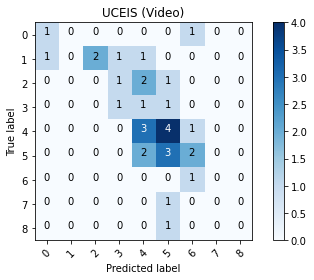

Stratified UCEIS Accuracy:  0.5
Confusion matrix, without normalization
[[2 4 1 0]
 [0 8 7 0]
 [0 2 6 0]
 [0 0 2 0]]


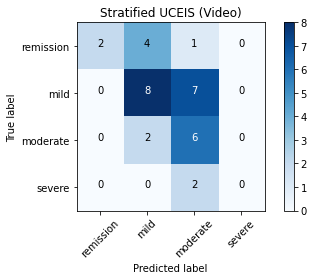

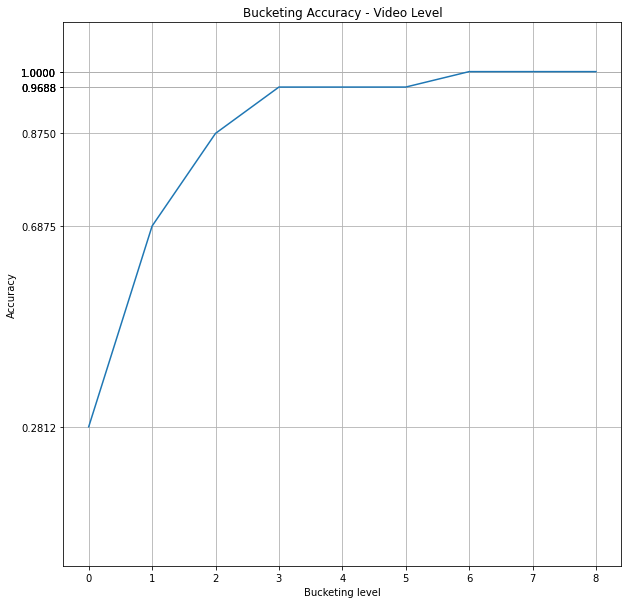

In [95]:
cm_UCEIS = confusion_matrix(true_video_scores, pred_video_scores_rounded, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])
accuracy_UCEIS = accuracy_score(true_video_scores, pred_video_scores_rounded)

print("UCEIS Accuracy: ", accuracy_UCEIS)
plot_confusion_matrix_2(cm_UCEIS, classes=["0", "1", "2", "3", "4", "5", "6", "7", "8"], title="UCEIS (Video)")
plt.show()

y_true_stratified, y_pred_stratified = get_stratified_UCEIS_accuracies(true_video_scores, pred_video_scores_rounded)
cm_UCEIS_stratified = confusion_matrix(y_true_stratified, y_pred_stratified, labels=[0,1,2,3])
accuracy_UCEIS_stratified = accuracy_score(y_true_stratified, y_pred_stratified)

print("Stratified UCEIS Accuracy: ", accuracy_UCEIS_stratified)
plot_confusion_matrix_2(cm_UCEIS_stratified, classes=["remission", "mild", "moderate", "severe"], title="Stratified UCEIS (Video)")
plt.show()

bucketing_scores = get_all_level_bucketing_accuracy(true_video_scores, pred_video_scores_rounded)

plt.figure(figsize=(10,10))
plt.plot(bucketing_scores)
plt.title("Bucketing Accuracy - Video Level")
plt.xlabel("Bucketing level")
plt.ylabel("Accuracy")
plt.yticks(bucketing_scores)
plt.grid(True)
plt.ylim(0, 1.1)
plt.show()

In [3]:
label_hash_list = []
for i in range(len(project['label_rows'])):
    if(project['label_rows'][i]['data_title'].startswith('video')):
        print(project['label_rows'][i]['data_title'])
        label_hash_list.append(project['label_rows'][i]['label_hash'])

video 69 - 7.mp4
video 81 - 4.mp4
video 62 - 5.mp4
video 66 - 0.mp4
video 73 - 5.mp4
video 63 - 2.mp4
video 67 - 5.mp4
video 79 - 4.mp4
video 65 - 4.mp4
video 71 -1.mp4
video 87 - 6.mp4
video 88 - 1.mp4
video 90 - 3.mp4
video 64 - 1.mp4
video 74 - 2.mp4
video 76 - 4.mp4
video 77 - 3.mp4
video 68 - 1.mp4
video 75 - 5.mp4
video 80 - 2.mp4
video 72-1.mp4
video 70 - 2.mp4
video 82 - 5.mp4
video 78 - 5.mp4
video 83-4.mp4
video 85-0.mp4
video 84-3.mp4
video 86-5.mp4
video 92-4.mp4
video 94-8.mp4
video 91-4.mp4
video 93-4.mp4


In [5]:
len(label_hash_list)

32

In [4]:
label_blurb = client.get_label_row(label_hash_list[0])

[04/12/2021 01:02:16 PM] [INFO] [querier.py:112] [execute()] Request: {"query_type": "labelrow", "query_method": "GET", "values": {"uid": "75958069-887a-4ca3-b763-78e4d9b..


In [5]:
label_blurb.keys()

dict_keys(['label_hash', 'data_title', 'data_type', 'data_units', 'object_answers', 'classification_answers', 'label_status'])

In [6]:
label_blurb['classification_answers']

{'da0735e5': {'classificationHash': 'da0735e5',
  'classifications': [{'name': 'Vascular pattern score',
    'value': 'vascular_pattern_score',
    'answers': [{'name': 'Complete',
      'value': 'complete',
      'featureHash': 'd9aa49f5-babe-4bac-bd7b-691c92588fd0'}],
    'featureHash': '0480a66e-9b49-4a8e-94db-4288463d5f74',
    'manualAnnotation': True}]},
 '0be73829': {'classificationHash': '0be73829',
  'classifications': [{'name': 'Bleeding score',
    'value': 'bleeding_score',
    'answers': [{'name': 'None',
      'value': 'none',
      'featureHash': 'c0f5dd0d-688b-451f-9c08-378c2d8a5bb8'}],
    'featureHash': '7938122d-8f6e-44ed-b4aa-1ca3de9adf30',
    'manualAnnotation': True}]},
 '42213a3d': {'classificationHash': '42213a3d',
  'classifications': [{'name': 'Bleeding score',
    'value': 'bleeding_score',
    'answers': [{'name': 'Luminal mild',
      'value': 'luminal_mild',
      'featureHash': '3a0a3cec-a444-46bd-9b0e-8f6d3f09d7cd'}],
    'featureHash': '7938122d-8f6e-4

In [10]:
label_blurb['data_units']['1187e970-0e92-405f-a212-4ed096cf8a5d']['labels']

{'0': {'objects': [],
  'classifications': [{'name': 'Vascular pattern score',
    'createdAt': 'Sat, 03 Apr 2021 13:41:45 GMT',
    'createdBy': 'mehulpatel1@doctors.org.uk',
    'confidence': 1,
    'featureHash': '6f8bf81b-714d-4387-bef6-7bd26d075968',
    'classificationHash': 'da0735e5',
    'manualAnnotation': True},
   {'name': 'Erosions score',
    'value': 'erosions_score',
    'createdAt': 'Sun, 04 Apr 2021 09:50:16 GMT',
    'createdBy': 'mehulpatel1@doctors.org.uk',
    'confidence': 1,
    'featureHash': '838e3c07-d471-4b9c-997f-214cc2d93312',
    'classificationHash': 'af5e4cd4',
    'manualAnnotation': True}]},
 '1': {'objects': [],
  'classifications': [{'name': 'Vascular pattern score',
    'createdAt': 'Sat, 03 Apr 2021 13:41:45 GMT',
    'createdBy': 'mehulpatel1@doctors.org.uk',
    'confidence': 1,
    'featureHash': '6f8bf81b-714d-4387-bef6-7bd26d075968',
    'classificationHash': 'da0735e5',
    'manualAnnotation': True},
   {'name': 'Erosions score',
    'value'